<a href="https://colab.research.google.com/github/dbckz/dissertation/blob/master/notebooks/take_the_knee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import ast
import os
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm
from google.colab import drive
import plotly.graph_objects as go

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# Set up paths
root_path = "/content/drive/MyDrive/University/Dissertation/data_collection"
graph_path = root_path + "/graphs"

day_paths = day_paths = [
        "/01",
        "/02",
        "/03",
        "/04",
        "/05",
        "/06",
        "/07",
        "/08",
        "/09",
        "/10",
        "/11",
        "/12",
        "/13",
        "/14",
        "/15",
        "/16",
        "/17",
        "/18",
        "/19",
        "/20",
        "/21",
        "/22",
        "/23",
        "/24",
        "/25",
        "/26",
        "/27",
        "/28",
        "/29",
        "/30",
        "/31",
        "/32",
        "/33",
        "/34",
        "/35",
        "/36"
    ]

In [ ]:
# Create directory to store visualisations
try:
    os.mkdir(graph_path)
except OSError as error:
    print(error)

In [87]:
# Load data
in_tweets = pd.DataFrame()
hb_guard = pd.DataFrame()
for path in day_paths:
    directory = root_path + path
    tweets_csv = directory + "/tweets.csv"
    matched_terms_csv = directory + "/hatebase_processed_tweets.csv"

    print(f"Loading CSVs for directory {path}...")
    in_tweets = pd.concat([in_tweets, 
                           pd.read_csv(tweets_csv,
                                       usecols = [
                                                  'created_at',
                                                  'tweet_id',
                                                  'tweet_text',
                                                  'accounts_mentioned'
                                       ],
                                       dtype = {
                                          # 'created_at':
                                          'tweet_id': np.int64,
                                          'tweet_text': str,
                                          'accounts_mentioned': object
                                       },
                                       parse_dates=['created_at'])])

    hb_guard = pd.concat([hb_guard, pd.read_csv(matched_terms_csv,
                                                usecols = [
                                                           'tweet_id',
                                                           'matching_hatebase_terms_over_70',
                                                           'matching_hatebase_terms_ethnicity_over_70',
                                                           'matching_hatebase_terms_nationality_over_70',
                                                           'matching_hatebase_terms_gender_over_70',
                                                           'matching_hatebase_terms_sexual_orientation_over_70',
                                                           'matching_hatebase_terms_class_over_70',
                                                           'matching_hatebase_terms_religion_over_70',
                                                           'matching_hatebase_terms_disability_over_70'
                                                ],
                                                dtype = {
                                                    'tweet_id': np.int64,
                                                    'matching_hatebase_terms_over_70': str,
                                                    'matching_hatebase_terms_ethnicity_over_70': str,
                                                    'matching_hatebase_terms_nationality_over_70': str,
                                                    'matching_hatebase_terms_gender_over_70': str,
                                                    'matching_hatebase_terms_sexual_orientation_over_70': str,
                                                    'matching_hatebase_terms_class_over_70': str,
                                                    'matching_hatebase_terms_religion_over_70': str,
                                                    'matching_hatebase_terms_disability_over_70': str
                                                })])

Loading CSVs for directory /01...
Loading CSVs for directory /02...
Loading CSVs for directory /03...
Loading CSVs for directory /04...
Loading CSVs for directory /05...
Loading CSVs for directory /06...
Loading CSVs for directory /07...
Loading CSVs for directory /08...
Loading CSVs for directory /09...
Loading CSVs for directory /10...
Loading CSVs for directory /11...
Loading CSVs for directory /12...
Loading CSVs for directory /13...
Loading CSVs for directory /14...
Loading CSVs for directory /15...
Loading CSVs for directory /16...
Loading CSVs for directory /17...
Loading CSVs for directory /18...
Loading CSVs for directory /19...
Loading CSVs for directory /20...
Loading CSVs for directory /21...
Loading CSVs for directory /22...
Loading CSVs for directory /23...
Loading CSVs for directory /24...
Loading CSVs for directory /25...
Loading CSVs for directory /26...
Loading CSVs for directory /27...
Loading CSVs for directory /28...
Loading CSVs for directory /29...
Loading CSVs f

In [88]:
# Dedup
original_tweets_length = len(in_tweets)
original_hatebase_length = len(hb_guard)
in_tweets.drop_duplicates(subset=['tweet_id'], inplace=True)
hb_guard.drop_duplicates(subset=['tweet_id'], inplace=True)
print(f"Size of tweets dataframe: {len(in_tweets)}, having dropped {original_tweets_length - len(in_tweets)} duplicate rows")
print(f"Size of hatebase dataframe: {len(hb_guard)}, having dropped {original_hatebase_length - len(hb_guard)} duplicate rows")

Size of tweets dataframe: 1478009, having dropped 133 duplicate rows
Size of hatebase dataframe: 1478009, having dropped 133 duplicate rows


In [89]:
# Join tables + drop old ones!
joined_df = pd.merge(in_tweets, hb_guard, how='outer', on='tweet_id')
original_joined_length = len(joined_df)
del hb_guard
del in_tweets

joined_df = joined_df[joined_df['tweet_text'].str.contains("(?i)#taketheknee|#bootheknee")]
print(f"Size of joined dataframe: {len(joined_df)}, having dropped {original_joined_length - len(joined_df)} non-knee-related tweets")

Size of joined dataframe: 13928, having dropped 1464081 non-knee-related tweets


In [90]:
joined_df['boo_tag'] = joined_df['tweet_text'].str.contains("(?i)bootheknee").astype(np.bool)
joined_df['take_tag'] = joined_df['tweet_text'].str.contains("(?i)taketheknee").astype(np.bool)
print(f"{joined_df['take_tag'].sum()} #TakeTheKnee tweets")
print(f"{joined_df['boo_tag'].sum()} #BooTheKnee tweets")

12920 #TakeTheKnee tweets
1035 #BooTheKnee tweets


In [91]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13928 entries, 11519 to 1477768
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype              
---  ------                                              --------------  -----              
 0   tweet_text                                          13928 non-null  object             
 1   tweet_id                                            13928 non-null  int64              
 2   created_at                                          13928 non-null  datetime64[ns, UTC]
 3   accounts_mentioned                                  13928 non-null  object             
 4   matching_hatebase_terms_over_70                     13928 non-null  object             
 5   matching_hatebase_terms_nationality_over_70         13928 non-null  object             
 6   matching_hatebase_terms_ethnicity_over_70           13928 non-null  object             
 7   matching_hatebase_terms_religion_over_70   

In [92]:
df = joined_df.resample(pd.offsets.Hour(24), on='created_at')['boo_tag', 'take_tag'].sum().reset_index()

data0 = go.Bar(
    x = df.created_at,
    y = df.boo_tag,
    name = '#BooTheKnee',
    text = df.boo_tag,
    textposition = 'inside'
    # texttemplate = '%{text:.2}'
)

data1 = go.Bar(
    x = df.created_at,
    y = df.take_tag,
    name = '#TakeTheKnee',
    text = df.take_tag,
    textposition = 'inside'
    # texttemplate = '%{text:.2}'
)

data = [data0, data1]

layout = go.Layout(title = "Taking of the knee", barmode='group')

figure = go.Figure(data = data, layout = layout)
figure.show()

In [93]:
layout = go.Layout(title = "#BooTheKnee")
figure = go.Figure(data = data0, layout=layout)
figure.show()

layout = go.Layout(title = "#TakeTheKnee")
figure = go.Figure(data = data1, layout=layout)
figure.show()

In [96]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13928 entries, 0 to 13927
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype              
---  ------                                              --------------  -----              
 0   tweet_text                                          13928 non-null  object             
 1   tweet_id                                            13928 non-null  int64              
 2   created_at                                          13928 non-null  datetime64[ns, UTC]
 3   accounts_mentioned                                  13928 non-null  object             
 4   matching_hatebase_terms_over_70                     13928 non-null  object             
 5   matching_hatebase_terms_nationality_over_70         13928 non-null  object             
 6   matching_hatebase_terms_ethnicity_over_70           13928 non-null  object             
 7   matching_hatebase_terms_religion_over_70         

In [95]:
# NOTE: at this point you need to manually review the emoji tweets in emoji_tweets.csv, and put them into a emoji_tweets_reviewed.csv

reviewed_emojis = pd.read_csv(root_path + '/emoji_tweets_reviewed.csv')
reviewed_emojis['manually_reviewed_emoji_is_offensive'] = True
reviewed_emojis.drop('tweet_text', axis=1, inplace=True)
joined_df = pd.merge(joined_df, reviewed_emojis, how='left', on='tweet_id')
joined_df['manually_reviewed_emoji_is_offensive'] = joined_df['manually_reviewed_emoji_is_offensive'].fillna(False)

In [97]:
joined_df['contains_slurs'] = joined_df['matching_hatebase_terms_over_70'].str.len() > 2
joined_df['contains_slurs_or_offensive_emoji'] = joined_df['contains_slurs'] | joined_df['manually_reviewed_emoji_is_offensive']
joined_df['boo_and_offensive'] = joined_df['contains_slurs_or_offensive_emoji'] & joined_df['boo_tag']
joined_df['take_and_offensive'] = joined_df['contains_slurs_or_offensive_emoji'] & joined_df['take_tag']

In [99]:
# This doesn't really make sense... with Perspective it might make more sense. Or we could say "percentage of tweets containing other racist slurs, and these the ones that were top..."

df = joined_df.resample(pd.offsets.Hour(24), on='created_at')['boo_tag', 'take_tag', 'boo_and_offensive', 'take_and_offensive'].sum().reset_index()

data0 = go.Bar(
    x = df.created_at,
    y = df.boo_and_offensive,
    name = 'offensive',
    text = df.boo_and_offensive,
    textposition = 'inside'
    # texttemplate = '%{text:.2}'
)

data1 = go.Bar(
    x = df.created_at,
    y = df.boo_tag - df.boo_and_offensive,
    name = 'non-offensive',
    text = df.boo_tag - df.boo_and_offensive,
    textposition = 'inside'
    # texttemplate = '%{text:.2}'
)

data = [data0, data1]

layout = go.Layout(title = "#BooTheKnee", barmode='stack')

figure = go.Figure(data = data, layout = layout)
figure.show()

data0 = go.Bar(
    x = df.created_at,
    y = df.take_and_offensive,
    name = 'offensive',
    text = df.take_and_offensive,
    textposition = 'inside'
    # texttemplate = '%{text:.2}'
)

data1 = go.Bar(
    x = df.created_at,
    y = df.take_tag - df.take_and_offensive,
    name = 'non-offensive',
    text = df.take_tag - df.take_and_offensive,
    textposition = 'inside'
    # texttemplate = '%{text:.2}'
)

data = [data0, data1]

layout = go.Layout(title = "#TakeTheKnee", barmode='stack')

figure = go.Figure(data = data, layout = layout)
figure.show()

In [100]:
# Menthod for creating a wordcloud, and print out the most frequently used slurs
def create_slur_wordcloud(col_name):
    list_of_terms = [a for b in joined_df[col_name][joined_df[col_name] != "[]"].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.split(", ") for a in b]
    wc = WordCloud(background_color="white", collocations=False).generate(" ".join(list_of_terms))
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    slur_df = pd.DataFrame(columns=["term", "count"])
    slur_df['term'] = list_of_terms
    slur_df['count'] = slur_df['count'].fillna(0)
    slur_df = slur_df.groupby(['term']).count()
    slur_df = slur_df.sort_values('count', axis=0, ascending=False)
    print(slur_df.head(20))

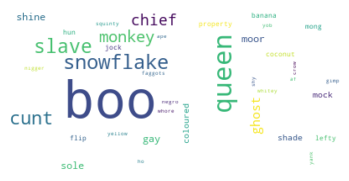

           count
term            
boo         1660
queen         31
snowflake     17
slaves        12
cunts         11
monkey        11
chief         10
ghost          7
cunt           4
shine          4
gay            4
sole           4
slave          4
moor           4
shade          3
coloured       3
mock           3
property       2
mong           2
lefty          2


In [101]:
create_slur_wordcloud("matching_hatebase_terms_over_70")

In [118]:
joined_df[joined_df['tweet_text'].str.contains('monkey')]['tweet_text']
for i in [3656, 5043, 6923, 7130, 7243, 8117, 9272, 11469]:
  print(joined_df.iloc[i]['tweet_text'])

(1/2) Well done @GarethSouthgate. You have summed it right up about #TakeTheKnee   ANYONE who makes monkey sounds at black people, NEWSFLASH, YOU ARE A #Racist  Known racists or racist enablers - @pritipatel, @BorisJohnson, @UEFA, @FIFA to begin with  https://t.co/2QdkTvxiwn.
"England doesn't have a problem with racism why do they take the knee" A black teenager misses a pen after good performances (besides the final) gets literally fucking monkey emoji sent you him. Absolutely get to fuck. Disgusting #TakeTheKnee #ENG https://t.co/mQXLYUx7t8
@MailOnline Really? the man who called Obama the "kenyan president" was on the wrong side when it came to #TakeTheKnee &amp; was silent when his friend put out a picture of Archie as a monkey, wan's to pretend he is not part of that culture?
🙌 Angela Rayner calls out not just past DOCUMENTED #Racism of #BorisJohnson &amp; fact he condoned protests AGAINST #TakeTheKnee   Ex UKIP Tory, George Eustice, refused to condemn #Millwall fans who booed &amp